In [7]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
import random
import matplotlib as mpl

## Метод Рунге-Кутты для векторов

In [8]:
## Метод Рунге-Кутты для векторовdef runge_kutta_vector(function, iterations, initial, step, parameters):
    values = [initial]
    t_val = [0]
    for i in range(round(iterations/step)):
        values1 = np.array(function(values[-1], parameters))
        values2 = np.array(function(values[-1] + step*values1/2, parameters))
        values3 = np.array(function(values[-1] + step*values2/2, parameters))
        values4 = np.array(function(values[-1] + step*values3, parameters))
        
        values.append(values[-1] + step*(values1 + 2*values2 + 2*values3 + values4)/6)
        t_val.append(t_val[-1]+step)
    return t_val, np.array(values)

## Дифференциальные уравнения для модели SIQR (Susceptible Infected Quarantined Recovered)

In [84]:
def siqr(values, t, N, beta, gamma, alpha, eta):
    s, i, q, r = values
    return [
        -beta*i*s/N,
        beta*i*s/N - (alpha + eta)*i,
        eta*i - gamma*q,
        gamma*q
    ]

In [93]:
gamma = 1/10
alpha = 0.067
eta = alpha
beta = 0.373
#print(beta)

N = 60000000
I0, Q0, R0 = 500, 250, 250
S0 = N - I0
t = np.linspace(0, 200, 200)

## Метод Рунге-Кутты столкнулся с проблемой деления на ноль, поэтому был использован метод решения ОДУ из библиотеки scipy

In [90]:
sol_siqr = odeint(siqr, [S0, I0, Q0, R0], t, args=(N, beta, gamma, alpha, eta))
s, i, q, r = sol_siqr[:, 0], sol_siqr[:, 1], sol_siqr[:, 2], sol_siqr[:, 3]

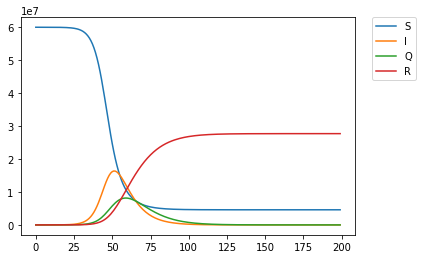

In [91]:
line1, = plt.plot(s, label='S')
line2, = plt.plot(i, label='I')
line3, = plt.plot(q, label='Q')
line4, = plt.plot(r, label='R')
plt.legend(handles=[line1, line2, line3, line4])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

## Увеличили долю людей на карантине в два раза

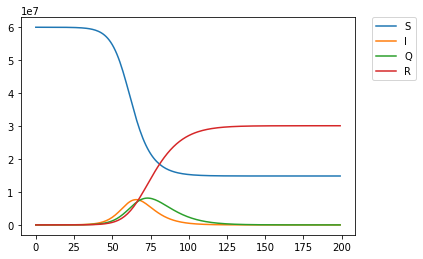

In [92]:
eta = 2*alpha
sol_siqr = odeint(siqr, [S0, I0, Q0, R0], t, args=(N, beta, gamma, alpha, eta))
s, i, q, r## Метод Рунге-Кутты столкнулся с проблемой деления на ноль, поэтому был использован метод решения ОДУ из библиотеки scipy = sol_siqr[:, 0], sol_siqr[:, 1], sol_siqr[:, 2], sol_siqr[:, 3]
line1, = plt.plot(s, label='S')
line2, = plt.plot(i, label='I')
line3, = plt.plot(q, label='Q')
line4, = plt.plot(r, label='R')
plt.legend(handles=[line1, line2, line3, line4])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)